# 0. importing modules & data & functions

In [1]:
!pip install optuna

     |████████████████████████████████| 307kB 5.1MB/s 
     |████████████████████████████████| 174kB 51.4MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 112kB 42.2MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 143kB 45.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=d3667f461dd0f90b44d076cca880e451ff2b0d5dcb85690b7f84946a0a216016
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [163]:
# Dataframe
import pandas as pd

# Numeric calculation
import numpy as np
import statistics as st
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# XGboost
from xgboost import XGBClassifier

# Optuna
import optuna


In [166]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#unsupervised learning library
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [5]:
!pip install category_encoders

In [4]:
from google.colab import files
upload = files.upload()

Saving unclean cclass.csv to unclean cclass.csv


In [8]:
data = pd.read_csv('unclean cclass.csv')

In [6]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis(df):
  result = pd.DataFrame()

  for col in df.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()


# 1. Problem Framing

**1.1 Business objective apa yang hendak dicapai melalui proyek ini?**

Untuk memprediksi harga mobil cclass

**1.2 Keluaran (output) seperti apa yang akan dihasilkan dari proyek ini dan bagaimana end user atau stakeholder akan memanfaatkan keluaran tersebut?**

stake holder akan bisa membuat valuasi mobil. ini akan menolong bisnis dealership second hand untuk setting harga.

**1.3 Machine learning task apa yang akan dikerjakan? (supervised/unsupervised learning, classification/regression/clustering/dimensionality reduction problem dsb.)**

supervised.

- lin reg
- KNN
- forest

**1.4 Performance measure apa yang akan digunakan di dalam proyek ini?**

- cross val score

**1.5 Risiko seperti apa yang mungkin diakibatkan oleh kesalahan prediksi dari model kalian?**

- bisnis over value/ under value asset mereka dalam perjualan
- over value * tidak ada yang beli
- under value * rugi

# 2. EDA

In [9]:
data.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


Data dalam tabel ini mempunyai banyak Dtype yang object.
- data-data object ini harus di encode sewaktu pre processing.
- untuk melakukan EDA kita akan melakukan initial data pre processing.

In [11]:
data.isnull().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

column price adalah target dari model kita berarti itu column yang penting.

- Untuk membuat dataset lebih akurat kita akan drop column column dimana price itu Nan.
- column price juga akan di convert dari string menjadi integer untuk mempermudah EDA.

Selain column price, banyak fitur fitur juga berbasis object.

- Dtype object akan susah di proses untuk Model dan juga untuk melakukan EDA.

In [12]:
data.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [13]:
data.tail()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481
4005,C Class,2014.0,"£14,800",Automatic,"55,445",37,£30,64.2,Diesel,2.143,/ad/25154247


In [15]:
# Kita akan splitting column yang mempunyai Dtype object dan non object
obj = data.select_dtypes(include='object')
na_obj = data.select_dtypes(exclude='object')

# Remove ',' dan '£' dari semua column
for i in obj.columns:
  obj[i] = obj[i].str.replace(',', '')
  obj[i] = obj[i].str.replace('£', '')


obj.reset_index(drop=True,inplace=True)
na_obj.reset_index(drop=True,inplace=True)

df = pd.concat([na_obj,obj],axis=1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,model,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,2020.0,C Class,30495,Automatic,NaN,Diesel,2,1200,NaN,NaN,/ad/25017331
1,2020.0,C Class,29989,Automatic,NaN,Petrol,1.5,1000,NaN,NaN,/ad/25043746
2,2020.0,C Class,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,2019.0,C Class,30399,Automatic,NaN,Diesel,2,5000,NaN,NaN,/ad/24942816
4,2019.0,C Class,29899,Automatic,NaN,Diesel,2,4500,NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,2017.0,C Class,14700,Manual,31357,25,150,70.6,Diesel,1.598,/ad/25451436
4002,2018.0,C Class,18500,Automatic,28248,31,150,64.2,Diesel,2.143,/ad/25451481
4003,2014.0,C Class,11900,Manual,48055,31,20,65.7,Diesel,2.143,/ad/25057204
4004,2014.0,C Class,11300,Automatic,49865,46,145,56.5,Diesel,2.143,/ad/25144481


Jumlah Nan Value lumayan banyak dari dataset ini. 

- Untuk mempermudah proses kita akan drop nan value.
- ini di justify dengan adanya banyak Nan value di fitur categorical yang mungkin agak bahaya untuk isi dengan mean/median/mode.

In [16]:
print('Before Drop :',df.shape)
df.dropna(inplace = True)

Before Drop : (4006, 11)


In [17]:
print('After Drop :',df.shape)

After Drop : (1208, 11)


Data dalam table masih banyak yang object. 
- kita akan convert berberapa fitur menjadi int biar bisa di visualise.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 10 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1208 non-null   float64
 1   model         1208 non-null   object 
 2   price         1208 non-null   object 
 3   transmission  1208 non-null   object 
 4   mileage       1208 non-null   object 
 5   fuel type     1208 non-null   object 
 6   engine size   1208 non-null   object 
 7   mileage2      1208 non-null   object 
 8   fuel type2    1208 non-null   object 
 9   engine size2  1208 non-null   object 
 10  reference     1208 non-null   object 
dtypes: float64(1), object(10)
memory usage: 113.2+ KB


Clean up year column

In [98]:
# new column with duplicates of year and as type string
df['year Released'] = df['year Released'].astype(str)

In [54]:
# removing '.0' from end of each year
df['year Released'] = df['year Released'].str.rstrip('.0')

In [80]:
# drop year column
df.drop(['year'],axis = 1, inplace = True)

In [99]:
df.head()

,model,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,year Released
10,C Class,9995,Automatic,44900.0,29,160,46.3,Petrol,1.6,/ad/25128085,2013
11,C Class,6995,Automatic,88200.0,34,125,58.9,Diesel,2.1,/ad/23763610,2012
12,C Class,7495,Automatic,115000.0,37,145,54.3,Diesel,2.1,/ad/24626603,2012
13,C Class,8995,Automatic,69250.0,29,150,53.3,Diesel,2.1,/ad/25462537,2011
14,C Class,14995,Automatic,49850.0,31,30,62.8,Diesel,2.1,/ad/25479169,2015


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 10 to 4005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1208 non-null   object 
 1   price          1208 non-null   int64  
 2   transmission   1208 non-null   object 
 3   mileage        1208 non-null   float64
 4   fuel type      1208 non-null   object 
 5   engine size    1208 non-null   object 
 6   mileage2       1208 non-null   float64
 7   fuel type2     1208 non-null   object 
 8   engine size2   1208 non-null   object 
 9   reference      1208 non-null   object 
 10  year Released  1208 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 153.2+ KB


Convert price column into dtype int

In [85]:
df['price'] = df['price'].astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 10 to 4005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model          1208 non-null   object
 1   price          1208 non-null   int64 
 2   transmission   1208 non-null   object
 3   mileage        1208 non-null   object
 4   fuel type      1208 non-null   object
 5   engine size    1208 non-null   object
 6   mileage2       1208 non-null   object
 7   fuel type2     1208 non-null   object
 8   engine size2   1208 non-null   object
 9   reference      1208 non-null   object
 10  year Released  1208 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 153.2+ KB


converting mileage & mileage 2 into dtype int

In [90]:
df['mileage'] = df['mileage'].astype(float)
df['mileage2'] = df['mileage2'].astype(float)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 10 to 4005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1208 non-null   object 
 1   price          1208 non-null   int64  
 2   transmission   1208 non-null   object 
 3   mileage        1208 non-null   float64
 4   fuel type      1208 non-null   object 
 5   engine size    1208 non-null   object 
 6   mileage2       1208 non-null   float64
 7   fuel type2     1208 non-null   object 
 8   engine size2   1208 non-null   object 
 9   reference      1208 non-null   object 
 10  year Released  1208 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 153.2+ KB


Converting engine size & engine size2 to float values.


In [124]:
df['engine size'] = df['engine size'].astype(float)

In [126]:
df['engine size2'] = df['engine size2'].replace(' ','')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 10 to 4005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1208 non-null   object 
 1   price          1208 non-null   int64  
 2   transmission   1208 non-null   object 
 3   mileage        1208 non-null   float64
 4   fuel type      1208 non-null   object 
 5   engine size    1208 non-null   float64
 6   mileage2       1208 non-null   float64
 7   fuel type2     1208 non-null   object 
 8   engine size2   1208 non-null   object 
 9   reference      1208 non-null   object 
 10  year Released  1208 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 153.2+ KB


1. distribusi data price

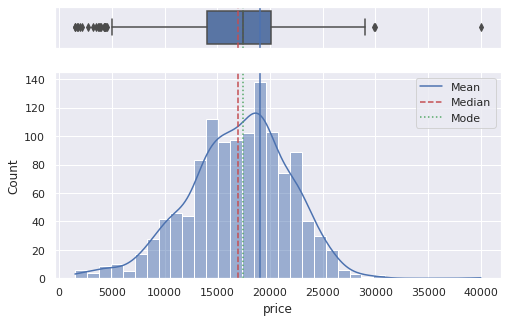

In [93]:
plot_distribution(df['price'])

Column price mempunyai banyak data outlier




2. Distribusi data price dengan year

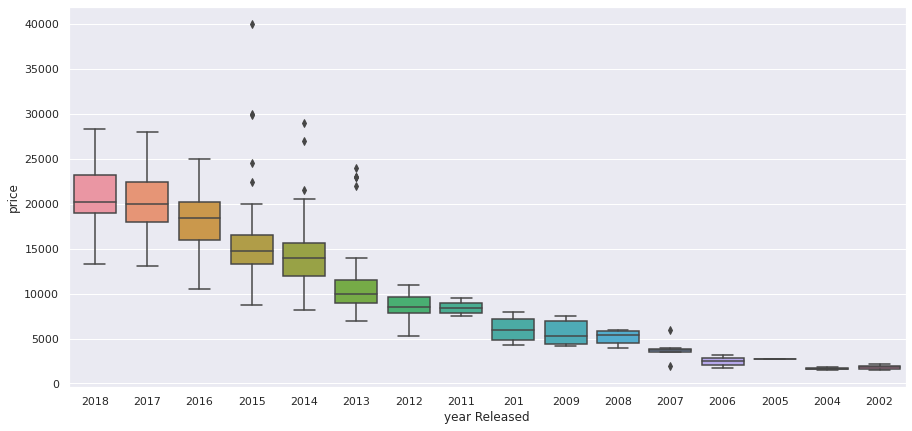

In [108]:
order_by = df.groupby(by=['year Released'])['price'].mean().iloc[::-1].index
plt.figure(figsize=(15,7))
sns.boxplot(x='year Released', y='price', data=df, order = order_by)

Mobil yang lebih baru mempunyai price point yang lebih tinggi.



*   mobil baru sering kali kualitasnya lebih baik dan belum kena depresiasi seperti model model yang lama.


3. distribusi mileage

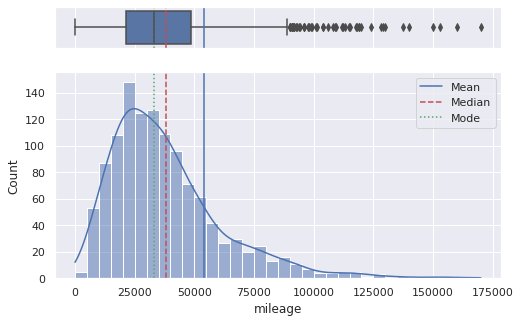

In [109]:
plot_distribution(df['mileage'])

Distribusi mileage kelihatan right skewed.

 - ada banyak outlier yang mileagenya sangat tinggi.

4. mileage vs price

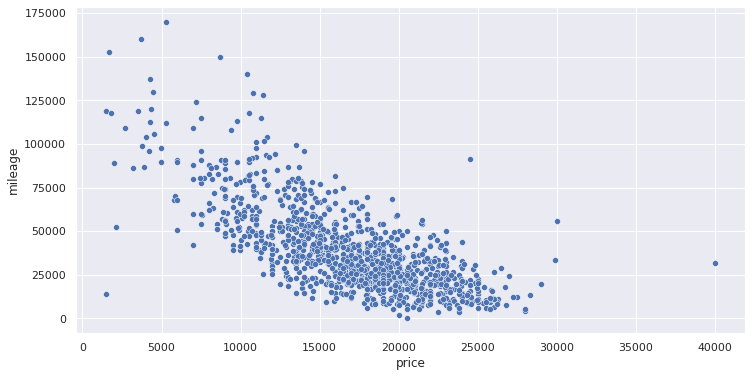

In [112]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='mileage', data=df)

dari scatter plot ini kita bisa lihat corelasi dari milage dan price.



*   lebih sering mobil dipakai lebih murah hargangya.
*   Mobil yang sering dipakai lebih terpengaruh depresiasi.





5. Transmission

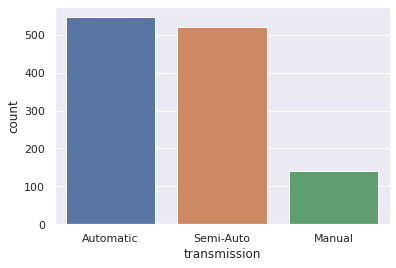

In [115]:
sns.countplot(x='transmission', data=df)

6. Transmission vs price

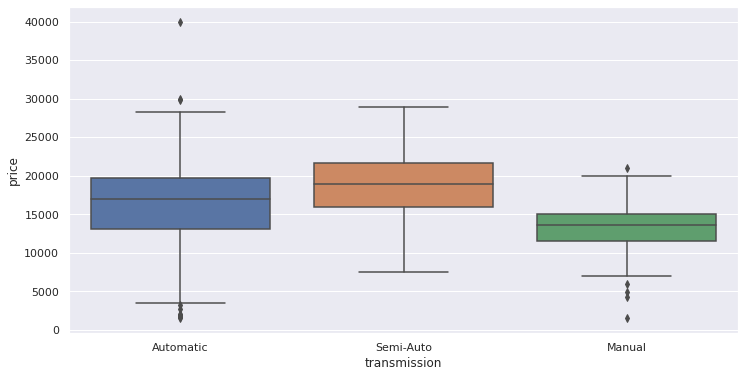

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(y='price', x = 'transmission', data=df)

rata rata harga mobil semi automatic lebih mahal dan rata rata mobil manual lebih murah.

7. Fuel type 2

kita akan pake feul type 2 karena data lebih jelas dan tidak ambigu.

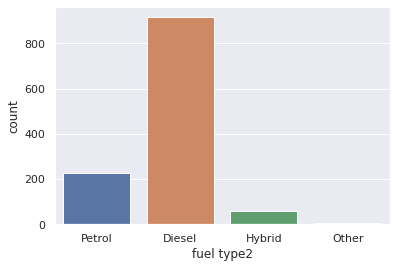

In [131]:
sns.countplot(x='fuel type2', data=df)

Jenis mobil yang paling banyak adalah mobil diesel. 

- diesel lebih effisien dari petrol dengan emisi Co2 lebih rendah.
- mobil moderen telah transisi dari memakai petrol dan sekarang diesel.

8. Feul Type 2 vs Price

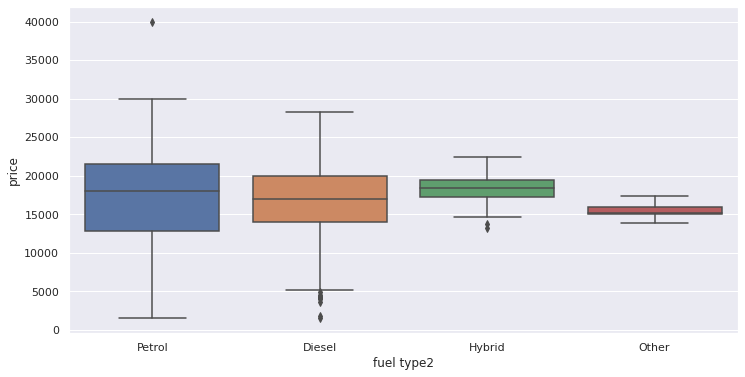

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(y='price', x = 'fuel type2', data=df)

Mesin petrol lebih kuat dan lebih gampang di tuning dari pada mesin deisel. tetapi mesin diesel lebih tahan lama. fakta ini bisa mengambarkan distribusi harga mesin petrol dimana banyak mesin petrol yang sudah mau rusak lebih murah dan mesin petrol yang di uptune extreme lebih mahal.

https://www.motorbiscuit.com/why-do-diesel-engines-last-longer-than-gasoline-engines/

https://www.picknbuy24.com/column_34.html

9. Distribusi semua fitur

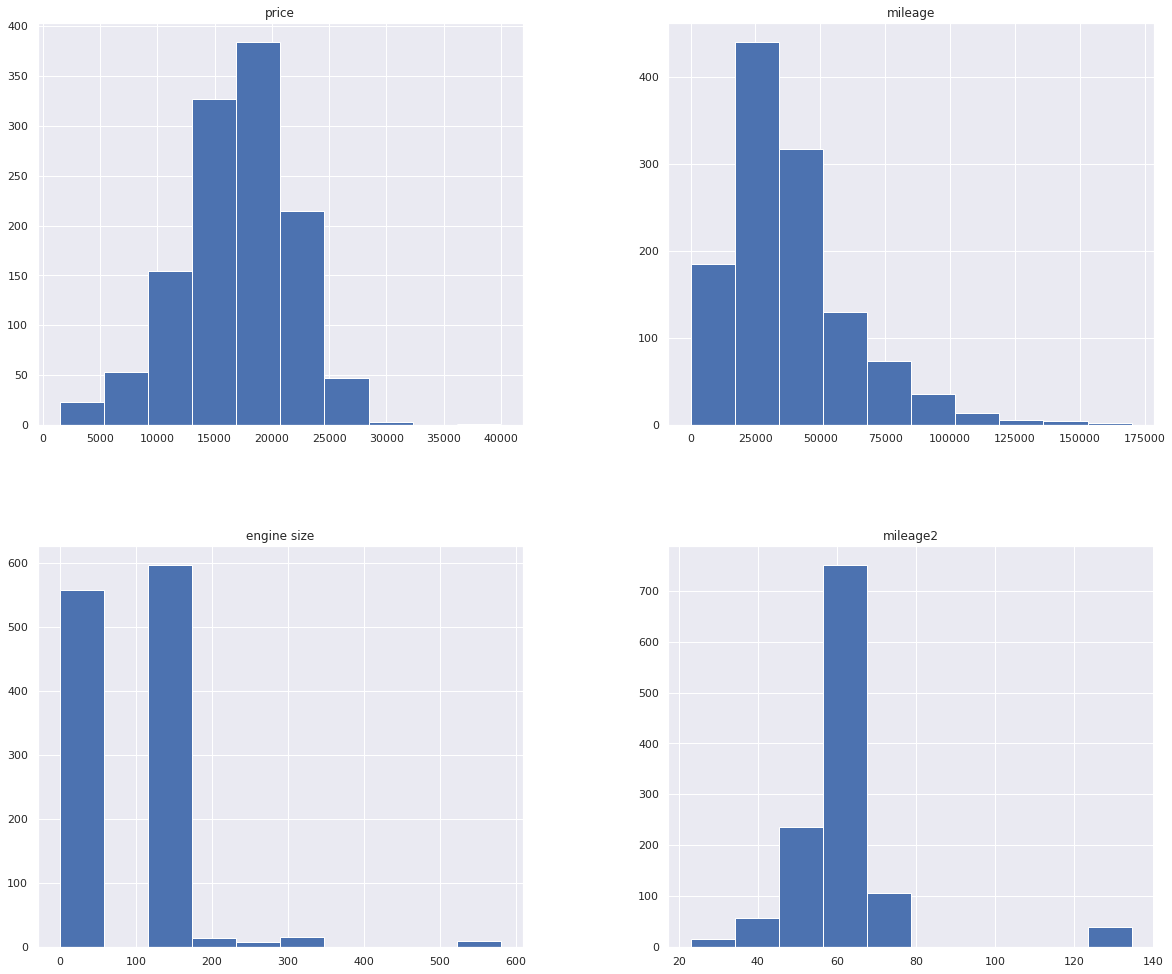

In [134]:
df.hist(figsize=(20,17))
plt.show()

<Figure size 432x288 with 0 Axes>

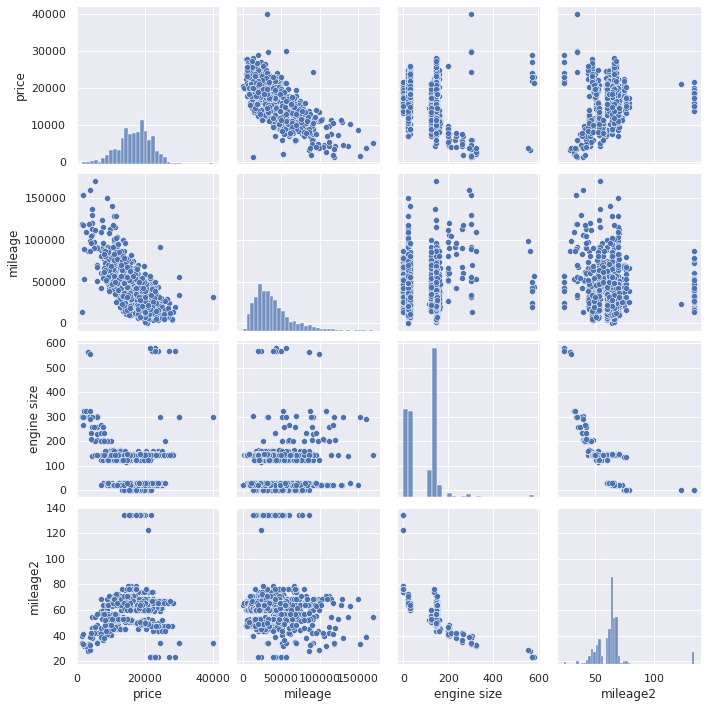

In [135]:
plt.figure()
sns.pairplot(df)
plt.show()

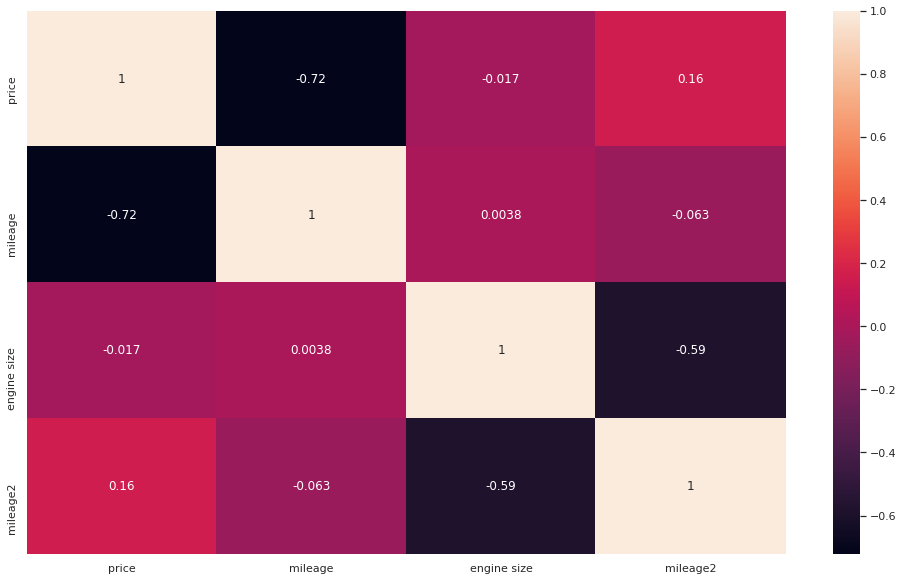

In [136]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [137]:
correlation = df.corr()['price'].abs().sort_values(ascending = False)
correlation

price          1.000000
mileage        0.722719
mileage2       0.156582
engine size    0.016954
Name: price, dtype: float64

# 3 & 4. Data prep & model training

In [184]:
df.head()

,model,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,year Released
10,C Class,9995,Automatic,44900.0,29,160.0,46.3,Petrol,1.6,/ad/25128085,2013
11,C Class,6995,Automatic,88200.0,34,125.0,58.9,Diesel,2.1,/ad/23763610,2012
12,C Class,7495,Automatic,115000.0,37,145.0,54.3,Diesel,2.1,/ad/24626603,2012
13,C Class,8995,Automatic,69250.0,29,150.0,53.3,Diesel,2.1,/ad/25462537,2011
14,C Class,14995,Automatic,49850.0,31,30.0,62.8,Diesel,2.1,/ad/25479169,2015


In [185]:
df_new = df[['price','transmission','mileage','fuel type2','engine size','year Released']]

In [211]:
df_ohe = pd.get_dummies(df_new)
df_ohe

,price,mileage,engine size,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel type2_Diesel,fuel type2_Hybrid,fuel type2_Other,fuel type2_Petrol,year Released_2002,year Released_2004,year Released_2005,year Released_2006,year Released_2007,year Released_2008,year Released_2009,year Released_201,year Released_2011,year Released_2012,year Released_2013,year Released_2014,year Released_2015,year Released_2016,year Released_2017,year Released_2018
10,9995,44900.0,160.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11,6995,88200.0,125.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,7495,115000.0,145.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13,8995,69250.0,150.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14,14995,49850.0,30.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,14700,31357.0,150.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4002,18500,28248.0,150.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4003,11900,48055.0,20.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4004,11300,49865.0,145.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [214]:
X = df_ohe.drop(['price'],axis = 1)
y = df_ohe['price']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [216]:
from sklearn.model_selection import cross_val_score

print('R-squared (training): ', lin_reg.score(X_train, y_train))
print('R-squared (CV): ', cross_val_score(lin_reg, X_train, y_train).mean())

R-squared (training):  -7.563162084843239
R-squared (CV):  0.7174417688883732


In [217]:
print('R-squared (training): ', knn.score(X_train, y_train))
print('R-squared (CV): ', cross_val_score(knn, X_train, y_train).mean())

R-squared (training):  0.6375627348861185
R-squared (CV):  0.44037697566233047


In [218]:
print('R-squared (training): ', rf.score(X_train, y_train))
print('R-squared (CV): ', cross_val_score(rf, X_train, y_train).mean())

R-squared (training):  0.6635186173264862
R-squared (CV):  0.7164992322406206


# 5. Evaluation, model selection & model tuning

Random forest mempunyai performance yang tertinggi.

In [219]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

param_grid = {
    'n_estimators': [50,100],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1,5],
    'max_features': ['auto', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(n_jobs=-1),
    param_grid,
    cv=3
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [220]:
max_rf = grid_search.best_estimator_.fit(X_train, y_train)

In [221]:
print('R-squared (training): ', max_rf.score(X_train, y_train))
print('R-squared (CV): ', cross_val_score(max_rf, X_train, y_train).mean())
print('R-squared (test): ', max_rf.score(X_test, y_test))

R-squared (training):  0.8628307665771927
R-squared (CV):  0.7420448557113598
R-squared (test):  0.7531634931556486


# 6. Result, Conclusion, and Recommendation

Berdasarkan model yang telah di bikin, ternyata random forest mempunyai skor ynag tertinggi. akurasi masih belum maximal tetapi model masih bisa menolong membuat valuasi kepada mobil cclass.